## Image Pre Processing

In [3]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='vRbVaygGdy71MU1EguFc_8FXxSewcIbSFXvAd9xXQBJq',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'emergingmethodsforearlydetectiono-donotdelete-pr-meoatyzjzinmpq'
object_key = 'Dataset.zip'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [4]:
from io import BytesIO
import zipfile
unzip = zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r')
file_paths = unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [1]:
pwd

'/home/wsuser/work'

In [5]:
pwd

'/home/wsuser/work'

In [6]:
import os
filenames=os.listdir('/home/wsuser/work/Dataset/train_set')

# Import Keras libraries

In [67]:
import keras

# Importing Image Data Generator from Keras

In [68]:
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

# Defining the parameter for image generator class

In [69]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,rotation_range=180,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,rotation_range=180,zoom_range=0.2,horizontal_flip=True)

In [70]:
#Applying image data generator functionality to trainset 
x_train=train_datagen.flow_from_directory('/home/wsuser/work/Dataset/train_set/',
target_size=(150,150),batch_size=32,class_mode='binary')

Found 436 images belonging to 2 classes.


In [71]:
#Applying image data generator functionality to trainset
x_test=test_datagen.flow_from_directory('/home/wsuser/work/Dataset/test_set',
target_size=(150,150),batch_size=32,class_mode='binary')

Found 121 images belonging to 2 classes.


# MODEL BUILDING

In [72]:
#To define linear intialisation import Sequential 
from keras.models import Sequential
#To add layers import Dense
from keras.layers import Dense
#To creat Convolution kernal import Convolution2D
from keras.layers import Convolution2D
#import Maxpooling layer
from keras.layers import MaxPooling2D
#import Flatten layer
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

# Initializing the model and Adding CNN and Dense layers

In [73]:
#initializing the model
model=Sequential()
#add convolution layer
model.add(Convolution2D(32,(3,3),input_shape=(150,150,3),activation='relu'))
#add maxpooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
#add convolution layer
model.add(Convolution2D(64,(3,3),activation='relu'))
#add maxpooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
#add convolution layer
model.add(Convolution2D(128,(3,3),activation='relu'))
#add maxpooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
#add convolution layer
model.add(Convolution2D(128,(3,3),activation='relu'))
#add maxpooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
#add flatten layer
model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

# Configuring the learning process

In [74]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

# Training the model

In [15]:
r=model.fit(x_train,epochs=10,validation_data=x_test)

Epoch 1/10
14/14 [==============================] - 85s 6s/step - loss: 0.5977 - accuracy: 0.7936 - val_loss: 0.2293 - val_accuracy: 0.8926
Epoch 2/10
14/14 [==============================] - 82s 6s/step - loss: 0.3928 - accuracy: 0.8601 - val_loss: 0.2015 - val_accuracy: 0.9752
Epoch 3/10
14/14 [==============================] - 85s 6s/step - loss: 0.2003 - accuracy: 0.9266 - val_loss: 0.0283 - val_accuracy: 0.9917
Epoch 4/10
14/14 [==============================] - 84s 6s/step - loss: 0.1417 - accuracy: 0.9518 - val_loss: 0.0387 - val_accuracy: 0.9917
Epoch 5/10
14/14 [==============================] - 84s 6s/step - loss: 0.1422 - accuracy: 0.9427 - val_loss: 0.0265 - val_accuracy: 1.0000
Epoch 6/10
14/14 [==============================] - 83s 6s/step - loss: 0.1635 - accuracy: 0.9381 - val_loss: 0.0399 - val_accuracy: 1.0000
Epoch 7/10
14/14 [==============================] - 84s 6s/step - loss: 0.1464 - accuracy: 0.9404 - val_loss: 0.0292 - val_accuracy: 0.9917
Epoch 8/10
14/14 [==

# Save the model

In [16]:
model.save("forestalert.h5")

In [17]:
!tar -zcvf image-classification-model_new.tgz forestalert.h5

forestalert.h5


In [18]:
ls -1

Dataset/
forestalert.h5
image-classification-model_new.tgz


In [22]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 13.9 MB/s eta 0:00:01


# Replacing the credendials that were got from Watson Machine Learning service

In [23]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
                 "url": "https://us-south.ml.cloud.ibm.com",
                  "apikey" :"4edltW4RsVTMfg_Ni5NrIwkltXTmh3Y8xg3ms3Ysrt1d"
                }
client = APIClient(wml_credentials)

In [24]:
client = APIClient(wml_credentials)

In [25]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources'] if item['entity']['name'] == space_name)['metadata']['id'])

In [26]:
space_uid = guid_from_space_name(client, 'Forest fire detection')
print("Space UID = " + space_uid)

Space UID = 4b776d80-ba2d-460b-ac44-dbbc2508e7d5


In [27]:
client.set.default_space(space_uid)

'SUCCESS'

In [28]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [61]:
software_spec_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_spec_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [62]:
model_details = client.repository.store_model(model='image-classification-model_new.tgz',meta_props={
client.repository.ModelMetaNames.NAME:"CNN",
client.repository.ModelMetaNames.TYPE:"tensorflow_rt22.1",
client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid}
                                             )
model_id = client.repository.get_model_uid(model_details)

This method is deprecated, please use get_model_id()


In [63]:
model_id

'a4275dc7-5c37-4454-afe9-42efaa67bb58'

In [101]:
client.repository.download("a4275dc7-5c37-4454-afe9-42efaa67bb58", 'forestfire1.tar.gz')

Successfully saved model content to file: 'forestfire1.tar.gz'


'/home/wsuser/work/forestfire1.tar.gz'

# Predictions

# Test case-1

In [120]:
#import load model from keras.model
from keras.models import load_model
#import image from keras
from tensorflow.keras.preprocessing import image
import numpy as np
#import cv2
import cv2
#load the saved model
model=load_model("forestalert.h5")
img=image.load_img('/home/wsuser/work/Dataset/test_set/with fire/forestfire.jpg')
x=image.img_to_array(img)
res=cv2.resize(x,dsize=(150,150),interpolation=cv2.INTER_CUBIC)
#expand the image shape
x=np.expand_dims(res,axis=0)

In [121]:
pred=model.predict(x)
pred = int(pred[0][0])
pred
int(pred)


1

In [122]:
if pred==1:
    print('Forest Fire')
elif pred==0:
    print('No Fire')

Forest Fire


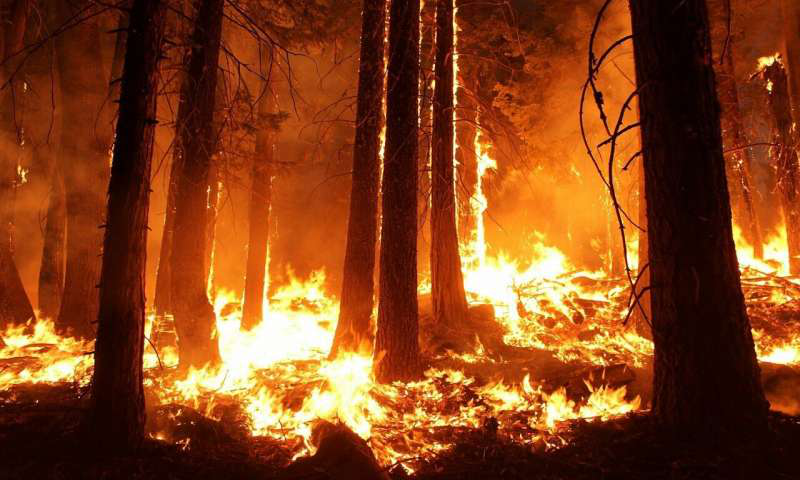

In [123]:
img

# Predictions

# Test case-2

In [95]:
#import load model from keras.model
from keras.models import load_model
#import image from keras
from tensorflow.keras.preprocessing import image
import numpy as np
#import cv2
import cv2
#load the saved model
model=load_model("forestalert.h5")
img=image.load_img('/home/wsuser/work/Dataset/test_set/forest/559672101517195076987621071193712n.jpg')
x=image.img_to_array(img)
res=cv2.resize(x,dsize=(150,150),interpolation=cv2.INTER_CUBIC)
#expand the image shape
x=np.expand_dims(res,axis=0)

In [96]:
pred=model.predict(x)
pred = int(pred[0][0])
pred
int(pred)


0

In [97]:
if pred==1:
    print('Forest Fire')
elif pred==0:
    print('No Fire')

No Fire


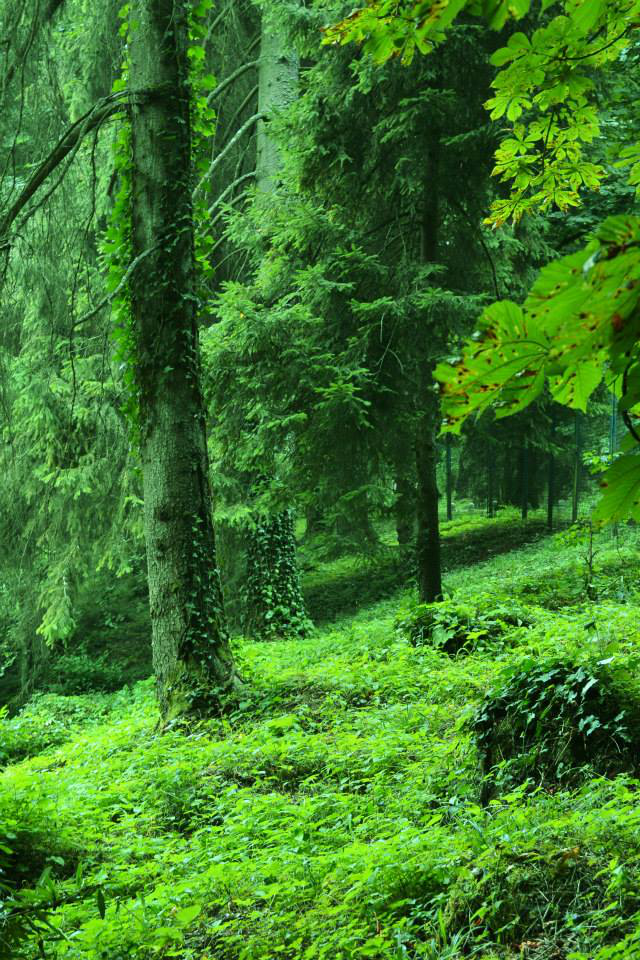

In [114]:
img